In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
class perceptron:
    

    def __init__(self, no_input, no_output, lr):
        self.lr = lr
        self.params = np.random.rand(no_output, no_input + 1)
        print(self)
        
    def evaluate(self, inputs):
        #return self.params * inputs.append(1)
        inputs = np.append(inputs, [1]).T
        output = self.activation_function(np.dot(self.params, inputs))
        return output
    
    def activation_function(self, arr):
        #return np.where(arr > 0.5, 1, 0)
        return 1 / (1 + np.exp(-arr))
    
    def sigmoid_derivative(self, x):
        return self.activation_function(x) * (1 - self.activation_function(x))
    
    def __repr__(self):
        return repr(self.params)
    
    def cost_function(self, output, predicted):
        return output - predicted
    
    def train(self, inputs, output):
        # Forward pass
        predicted = self.evaluate(inputs)
        cost = self.cost_function(output, predicted)
        
        # Append bias term
        inputs = np.append(inputs, [1])

        # Compute gradients
        gradient = cost * self.sigmoid_derivative(predicted)
        nudge = self.lr * np.outer(gradient, inputs)
        
        # Update weights
        self.params += nudge
        
        return self.error(cost)
        
    def error(self, cost):
        return cost ** 2

In [3]:
data = np.array([[0, 0], [0, 1], [1,0], [1,1]])

In [4]:
nn = None

In [5]:
epochs = 100000

In [6]:
def train(gate='AND'):
    global nn
    nn = perceptron(2, 1, 0.01)
    cost = 0
    for _ in range(epochs):
        cost  = 0
        for i in data:
            if gate == 'AND':
                op = np.all(i, keepdims=True)
            elif gate == 'OR':
                op = np.any(i, keepdims=True)
            elif gate == 'NOR':
                op = np.invert(np.any(i, keepdims=True))
            cost += nn.train(i, op)
    for i in data:
        print(i, nn.evaluate(i))
    print("Error =", cost)

In [7]:
x = np.linspace(-0.1, 1.1, 500)
y = np.linspace(-0.1, 1.1, 500)
xx, yy = np.meshgrid(x, y)

x1 = np.array([0, 1])
x2 = np.array([0, 1])
x1, x2 = np.meshgrid(x1, x2)

In [8]:
@np.vectorize
def evaluate(x, y):
    return nn.evaluate(np.array([x, y]))

In [9]:
def plot():
    zz = evaluate(xx, yy)
    plt.contourf(xx, yy, zz, cmap=cm.gray)
    plt.colorbar()
    plt.scatter(x1, x2)
    plt.show()

In [10]:
def retrain_and_plot(gate='AND'):
    train(gate)
    plot()

In [11]:
import copy

array([[0.48403227, 0.04125445, 0.47398879]])
[0 0] [0.020471]
[0 1] [0.98965677]
[1 0] [0.98965994]
[1 1] [0.99999772]
Error = [0.00063299]


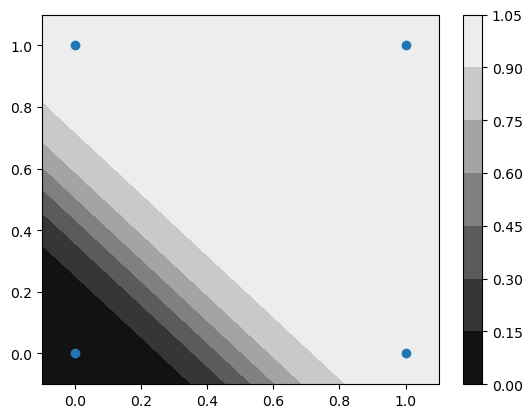

In [12]:
retrain_and_plot('OR')

In [13]:
or_model = copy.deepcopy(nn)

array([[0.85157409, 0.81897183, 0.98889678]])
[0 0] [1.51436913e-05]
[0 1] [0.0200088]
[1 0] [0.02001003]
[1 1] [0.96494766]
Error = [0.0020299]


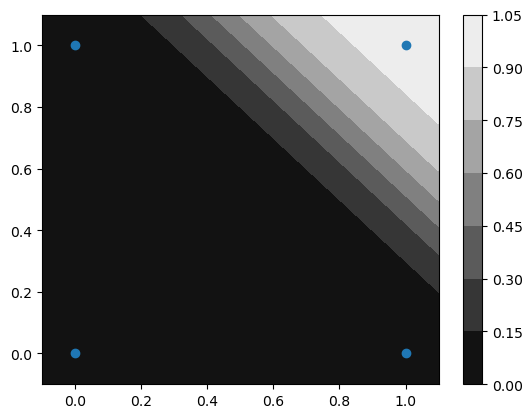

In [14]:
retrain_and_plot('AND')

In [15]:
and_model = copy.deepcopy(nn)

array([[0.3154722 , 0.03935694, 0.72110423]])
[0 0] [0.9745534]
[0 1] [0.0080903]
[1 0] [0.00809266]
[1 1] [1.73754467e-06]
Error = [0.0007785]


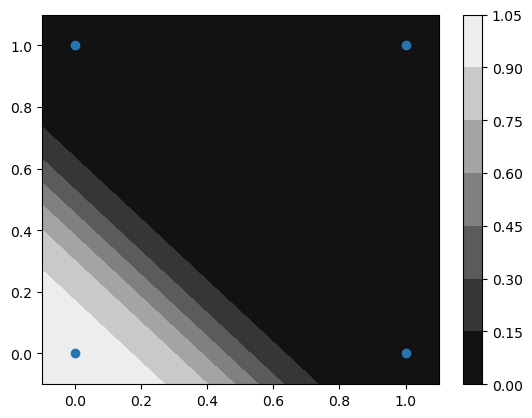

In [16]:
retrain_and_plot('NOR')

In [17]:
nor_model = copy.deepcopy(nn)

In [18]:
class xor_model():
    def evaluate(self, inputs):
        #return self.params * inputs.append(1)
        hidden_layer = np.array([nor_model.evaluate(inputs), and_model.evaluate(inputs)])
        output = nor_model.evaluate(hidden_layer)
        return output

In [19]:
nn = xor_model()

In [23]:
cost = 0
for i in data:
    op = nn.evaluate(i)
    print(i, op)
    cost += ((i[0] ^ i[1]) - op) ** 2
print("Error =", cost)

[0 0] [0.01001433]
[0 1] [0.96794864]
[1 0] [0.9679477]
[1 1] [0.01085049]
Error = [0.00227266]


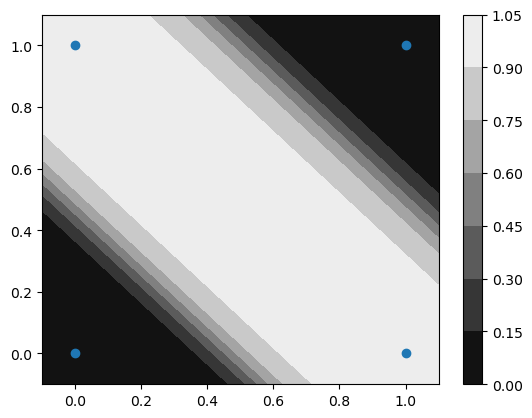

In [24]:
plot()